In [8]:
import os
import json
import pandas as pd
import jsonlines
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, models
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np 
import matplotlib.font_manager as fm



def read_json_files_in_directory(directory_path):
    json_data = []
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        data['text_id'] = os.path.basename(file).split('.')[0]
                        json_data.append(data)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    return json_data

def load_crimes_list(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        crimes = f.read().splitlines()
    return [crime.strip() for crime in crimes]

def contains_crime(input_string, crimes):
    return [crime for crime in crimes if crime in input_string]

def process_data(data, crimes):
    new_data = []
    for d in data:
        if "pjjg" in d:
            d['crimes'] = contains_crime(d['pjjg'], crimes)
            if len(d['crimes']) > 0 :
                new_dict = {}
                if "ajjbqk" in d and "cpfxgc" in d:
                    new_dict['fact'] = d['ajjbqk']
                    new_dict['reason'] = d['cpfxgc']
                    new_dict['text_id'] = d['text_id']
                    new_dict['crime'] = d['crimes']
                    new_data.append(new_dict)
    return new_data

def save_to_jsonl(data, file_path):
    with jsonlines.open(file_path, 'w') as writer:
        for d in data:
            writer.write(d)
    

In [9]:
directory_path = '/home/ray/suniRet/data/LeCaRD/candidates'
crimes_file_path = "/home/ray/suniRet/data/criminal charges_full.txt"
output_jsonl_path = "/home/ray/suniRet/data/LeCaRD_candidates.jsonl"
# model_name = "/home/ray/suniRet/train_output/train_simcse_mixture_small/checkpoint-1800"
# model_name = "BAAI/bge-large-zh-v1.5"
# model_name = "CSHaitao/SAILER_zh"
# model_name="thunlp/Lawformer"
# model_name = "hfl/chinese-bert-wwm"
# model_name = "cyclone/simcse-chinese-roberta-wwm-ext"


# 读取数据
data = read_json_files_in_directory(directory_path)

# 读取犯罪列表
crimes = load_crimes_list(crimes_file_path)

# 处理数据，提取相关字段并标注犯罪类型
new_data = process_data(data, crimes)

In [10]:
df = pd.DataFrame(new_data)

In [12]:
from collections import defaultdict
crime_dict = defaultdict(int)
for crimes in df.crime:
    for crime in crimes:
        if crime not in crime_dict:
            crime_dict[crime] = 1
        else:
            crime_dict[crime] += 1

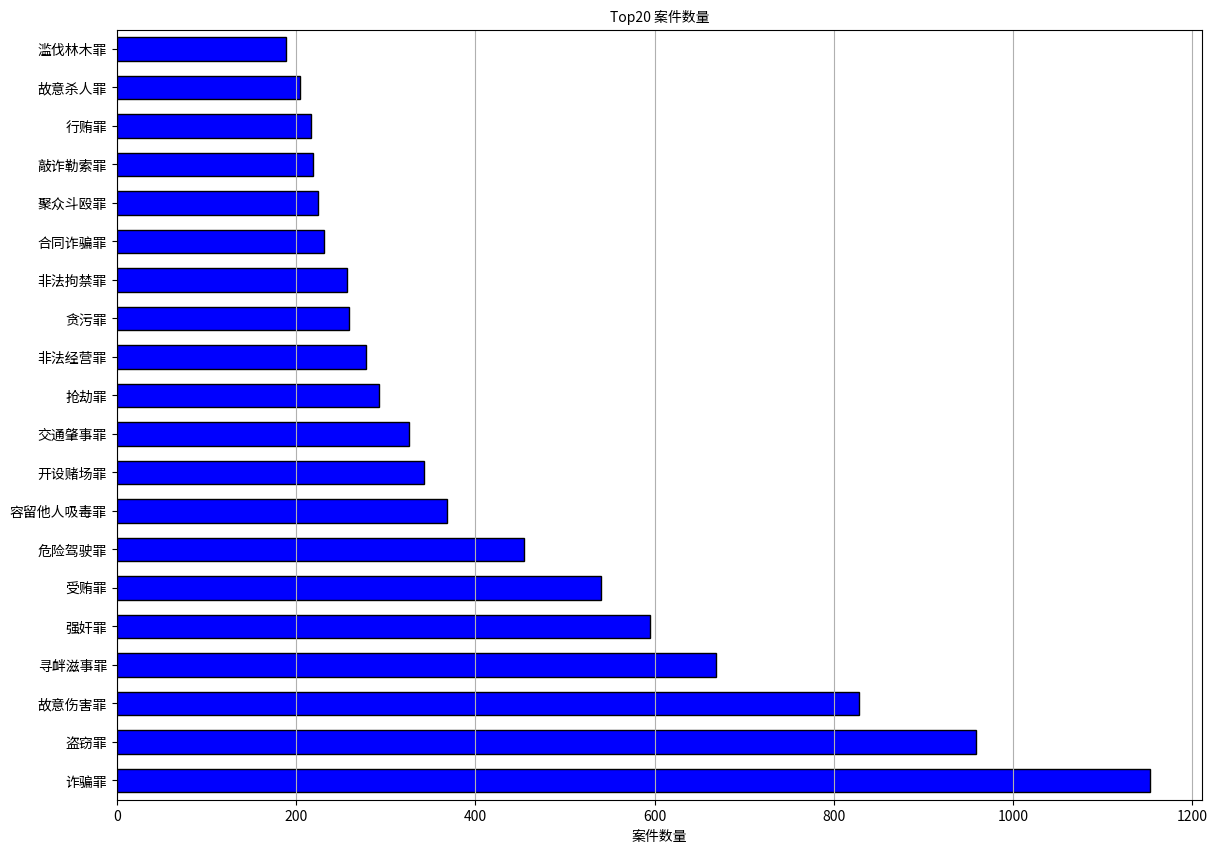

In [28]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Example data
crime_data = crime_dict
# Sorting the dictionary by values in descending order
sorted_crime_data = dict(sorted(crime_data.items(), key=lambda item: item[1], reverse=True))

# Extracting sorted crime types and their corresponding frequencies
crime_types = list(sorted_crime_data.keys())
crime_frequencies = list(sorted_crime_data.values())

# Define your custom font properties
prop = FontProperties(fname='/home/ray/suniRet/tools/NotoSansSC.ttf')  # Replace with the path to your font file

# Adjusting figure size and bar width
plt.figure(figsize=(14, 10))
bars = plt.barh(crime_types, crime_frequencies, color='blue', edgecolor='black', height=0.6)

# Adding titles and labels with custom font
plt.title('Top20 案件数量', fontproperties=prop)
plt.xlabel('案件数量', fontproperties=prop)
# plt.ylabel('Crime Type', fontproperties=prop)

# Applying font to tick labels
plt.xticks(fontproperties=prop)

# Only show top 10 crime types in the y-axis
plt.yticks(fontproperties=prop)
plt.gca().invert_yaxis()  # Ensure that the top crime is at the top of the chart
plt.gca().set_yticks(range(len(crime_types)))  # Set y-ticks for all bars
plt.gca().set_yticklabels(crime_types)  # Apply the crime types to the y-ticks

# Limiting the displayed y-axis to top 10 crimes
plt.gca().set_ylim(-0.5, 19.5)  # Show only the top 10 crimes

# Show grid for x-axis
plt.grid(True, axis='x')

# Show plot
plt.show()
